In [2]:
# data manipulation
# conda install -c conda-forge pandas
import pandas as pd
# conda install -c conda-forge numpy
import numpy as np
# conda install -c conda-forge openpyxl
import openpyxl
# conda install -c conda-forge missingno
import missingno as msno

# data visualisation
# conda install -c conda-forge matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
# conda install -c conda-forge seaborn
import seaborn as sns

from sklearn.model_selection import train_test_split

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

#  For showing all columns in Pandas
pd.set_option('display.max_columns', None)

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mno

from sklearn.model_selection import train_test_split

from bs4 import BeautifulSoup
import requests

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
%cd /content/drive/My Drive/Omdena_Liverpool_Project/DATA/parquet

/content/drive/.shortcut-targets-by-id/13C0hJDG3MCQB3jYvTCeWOeK3LQLLUZMA/Omdena_Liverpool_Project/DATA/parquet


In [5]:
vehicle = pd.read_parquet('vehicle_data.parquet')
accident = pd.read_parquet('accident_data.parquet')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

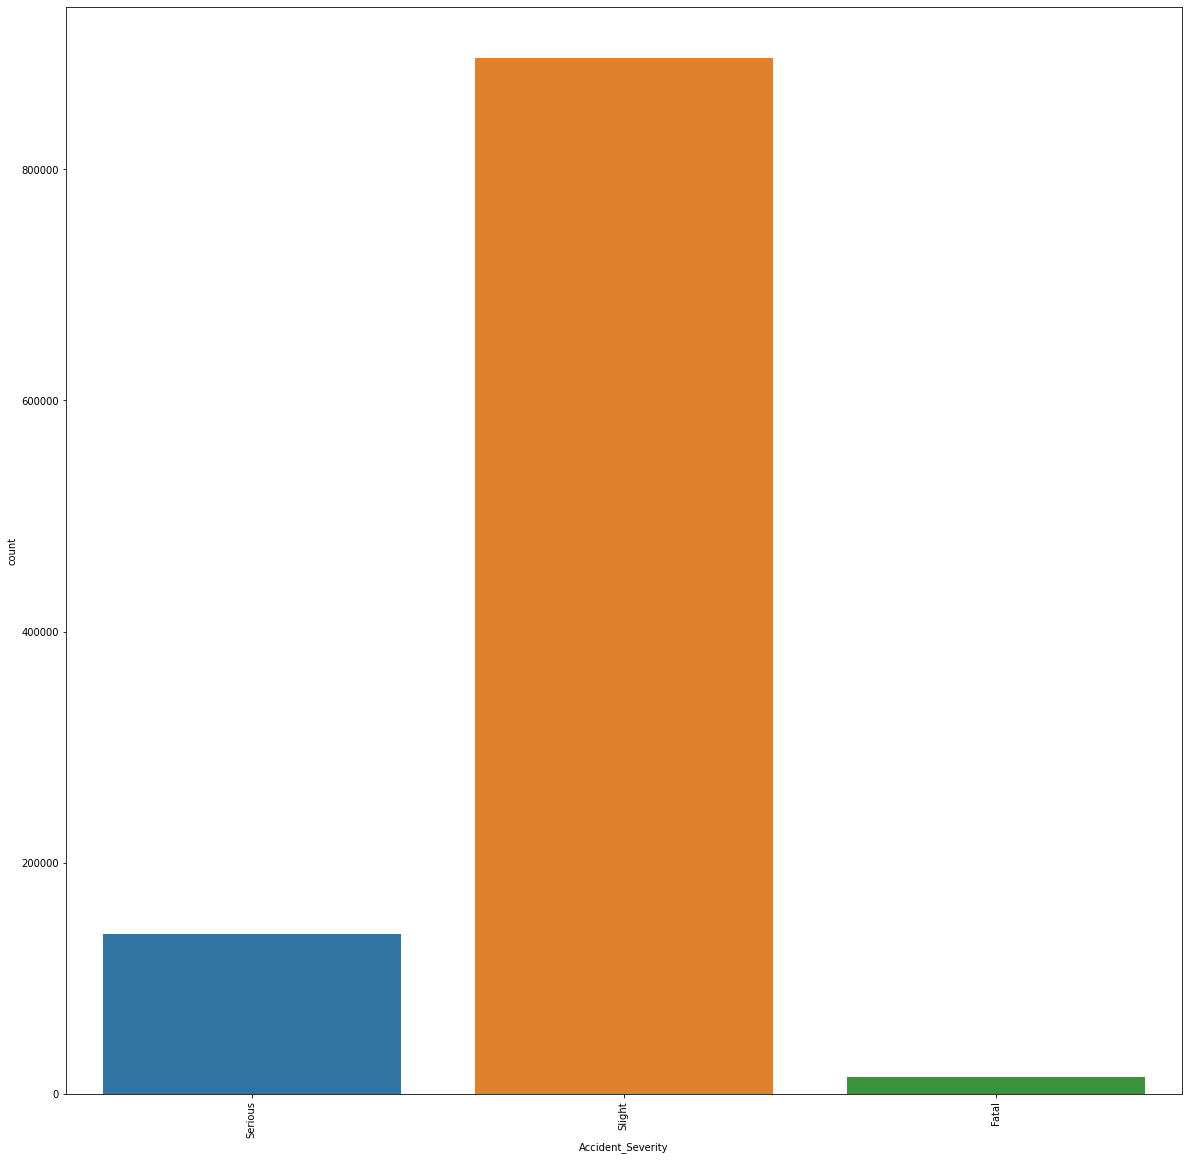

In [8]:
plt.figure(figsize=(20,20))
sns.countplot(x=accident['Accident_Severity'])
plt.xticks(rotation=90)

In [7]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177205 entries, 0 to 2177204
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Age_Band_of_Driver                object 
 2   Age_of_Vehicle                    float64
 3   Driver_Home_Area_Type             object 
 4   Driver_IMD_Decile                 float64
 5   Engine_Capacity_.CC.              float64
 6   Hit_Object_in_Carriageway         object 
 7   Hit_Object_off_Carriageway        object 
 8   Journey_Purpose_of_Driver         object 
 9   Junction_Location                 object 
 10  make                              object 
 11  model                             object 
 12  Propulsion_Code                   object 
 13  Sex_of_Driver                     object 
 14  Skidding_and_Overturning          object 
 15  Towing_and_Articulation           object 
 16  Vehicle_Leaving_Carriageway       ob

In [8]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1048575 non-null  object 
 1   1st_Road_Class                               742986 non-null   object 
 2   1st_Road_Number                              1048573 non-null  float64
 3   2nd_Road_Class                               608751 non-null   object 
 4   2nd_Road_Number                              1037772 non-null  float64
 5   Accident_Severity                            1048575 non-null  object 
 6   Carriageway_Hazards                          1048546 non-null  object 
 7   Date                                         1048575 non-null  object 
 8   Day_of_Week                                  1048575 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

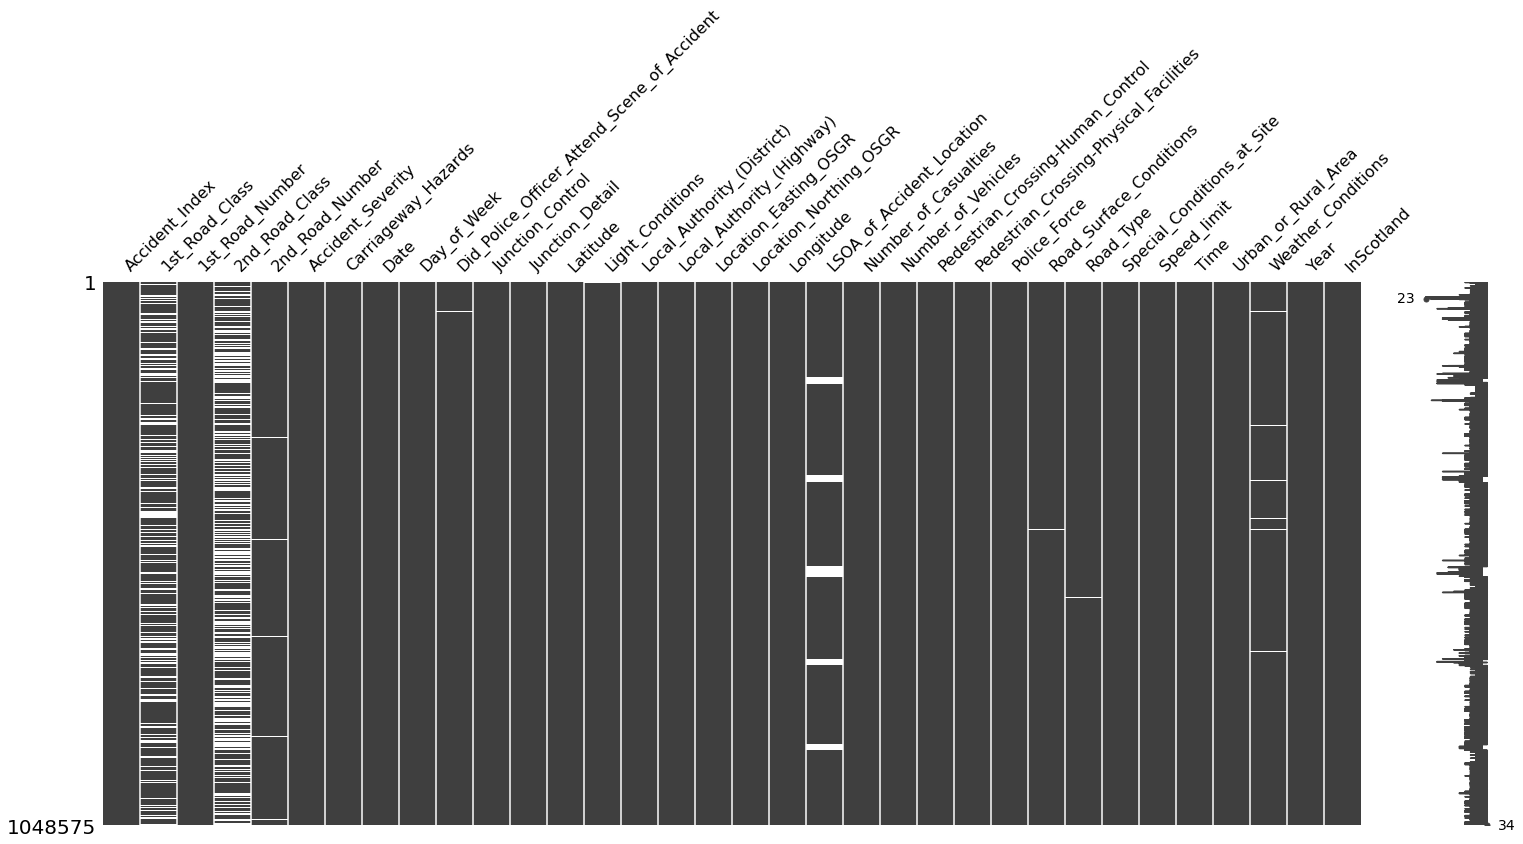

In [9]:
mno.matrix(accident)

In [11]:
accident['1st_Road_Class'].unique()

array(['A', 'B', 'C', None, 'Motorway', 'A(M)'], dtype=object)

In [12]:
accident.dropna(subset=['Carriageway_Hazards', 'Road_Surface_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Road_Type', 'Special_Conditions_at_Site', 'Latitude', 'Longitude', 'Light_Conditions', 'Pedestrian_Crossing-Human_Control', 'Time', 'Urban_or_Rural_Area', 'Pedestrian_Crossing-Physical_Facilities'], inplace=True)
accident['Weather_Conditions'].replace(np.NaN, 'Unknown', inplace=True)
accident['1st_Road_Class'].replace(np.NaN, 'Unclassified', inplace=True)
accident['1st_Road_Number'].replace(np.NaN, 'Unknown', inplace=True)
accident['2nd_Road_Class'].replace(np.NaN, 'No_2nd_Road_Class', inplace=True)
accident['2nd_Road_Number'].replace(np.NaN, 'Unknown', inplace=True)
accident['LSOA_of_Accident_Location'].replace(np.NaN, 'Unknown', inplace=True)

In [13]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037512 entries, 1 to 1048574
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1037512 non-null  object 
 1   1st_Road_Class                               1037512 non-null  object 
 2   1st_Road_Number                              1037512 non-null  object 
 3   2nd_Road_Class                               1037512 non-null  object 
 4   2nd_Road_Number                              1037512 non-null  object 
 5   Accident_Severity                            1037512 non-null  object 
 6   Carriageway_Hazards                          1037512 non-null  object 
 7   Date                                         1037512 non-null  object 
 8   Day_of_Week                                  1037512 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

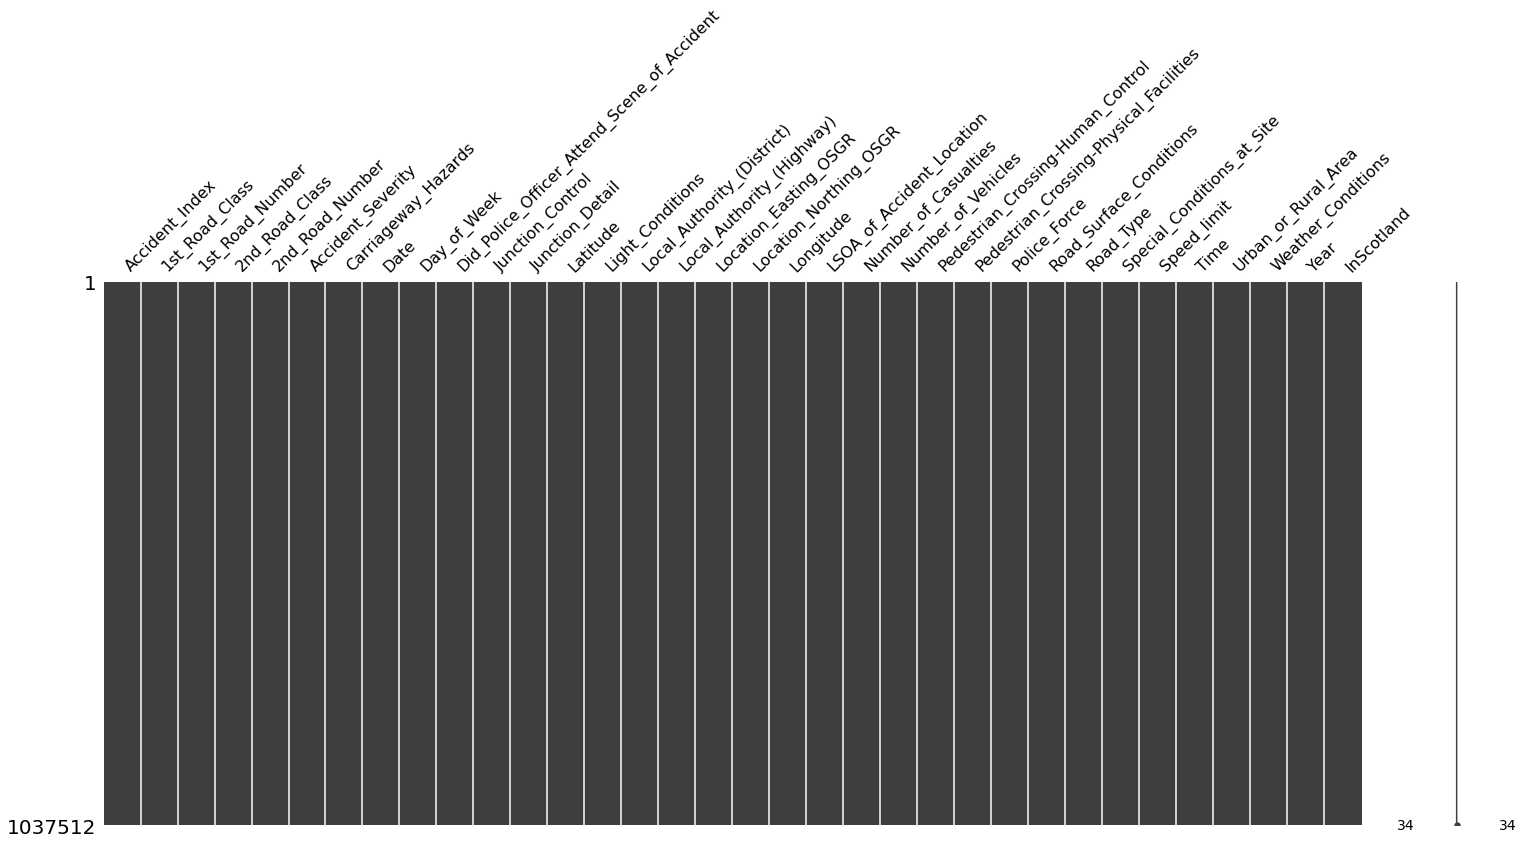

In [42]:
mno.matrix(accident)

In [41]:
for column in accident.columns:
    print(column + ' : ' + str(len(accident[column].unique())))
    if(len(accident[column].unique()) < 100):
        print(column + ' : ' + str(accident[column].unique()))
    print('\n')

Accident_Index : 663339


1st_Road_Class : 6
1st_Road_Class : ['B' 'C' 'Unclassified' 'A' 'Motorway' 'A(M)']


1st_Road_Number : 6540


2nd_Road_Class : 7
2nd_Road_Class : ['C' 'No_2nd_Road_Class' 'Unclassified' 'B' 'A' 'Motorway' 'A(M)']


2nd_Road_Number : 6934


Accident_Severity : 3
Accident_Severity : ['Slight' 'Serious' 'Fatal']


Carriageway_Hazards : 6
Carriageway_Hazards : ['None' 'Other object on road' 'Previous accident'
 'Any animal in carriageway (except ridden horse)' 'Vehicle load on road'
 'Pedestrian in carriageway - not injured']


Date : 2191


Day_of_Week : 7
Day_of_Week : ['Wednesday' 'Thursday' 'Monday' 'Saturday' 'Sunday' 'Tuesday' 'Friday']


Did_Police_Officer_Attend_Scene_of_Accident : 3
Did_Police_Officer_Attend_Scene_of_Accident : [1. 2. 3.]


Junction_Control : 7
Junction_Control : ['Auto traffic signal' 'Data missing or out of range'
 'Give way or uncontrolled' 'Stop sign' 'Authorised person'
 'Auto traffic sigl' 'Not at junction or within 20 metres']


Ju

In [ ]:
# get URL
page = requests.get(
    "https://en.wikipedia.org/wiki/List_of_police_forces_of_the_United_Kingdom"
                    )
# scrape webpage
soup = BeautifulSoup(
    page.content, 'html.parser'
                    )
policeForces = soup.find(
    'table',{'class':"wikitable"}
                   )
df_pf = pd.read_html(str(policeForces))

# convert list to dataframe and pull ot the Forces
df_pf = pd.DataFrame(df_pf[0])
force = df_pf['Force']

In [31]:
forceList = force.tolist()
print(forceList)

['Avon and Somerset Police', 'Bedfordshire Police', 'British Transport Police', 'Cambridgeshire Constabulary', 'Cheshire Constabulary', 'City of London Police', 'Civil Nuclear Constabulary', 'Cleveland Police', 'Cumbria Constabulary', 'Derbyshire Constabulary', 'Devon and Cornwall Police', 'Dorset Police', 'Durham Constabulary', 'Dyfed-Powys Police', 'Essex Police', 'Gloucestershire Constabulary', 'Greater Manchester Police', 'Gwent Police', 'Hampshire Constabulary', 'Hertfordshire Constabulary', 'Humberside Police', 'Kent Police', 'Lancashire Constabulary', 'Leicestershire Police', 'Lincolnshire Police', 'Merseyside Police', 'Metropolitan Police Service', 'Ministry of Defence Police', 'Norfolk Constabulary', 'North Wales Police', 'Northamptonshire Police', 'Northumbria Police', 'North Yorkshire Police', 'Nottinghamshire Police', 'Police Service of Northern Ireland', 'Police Scotland', 'South Wales Police', 'South Yorkshire Police', 'Staffordshire Police', 'Suffolk Constabulary', 'Surr

In [46]:
print(accident['Police_Force'].value_counts())

Metropolitan Police      141228
West Midlands             47462
Greater Manchester        42976
West Yorkshire            39651
Thames Valley             38972
Hampshire                 31219
Kent                      31047
Devon and Cornwall        30563
Lancashire                29791
Essex                     28455
Sussex                    28208
Avon and Somerset         27485
Strathclyde               26100
Surrey                    25263
Northumbria               24837
South Yorkshire           24070
Merseyside                22857
Staffordshire             21991
Cheshire                  20537
Nottinghamshire           19978
Hertfordshire             19766
South Wales               19514
West Mercia               18872
Derbyshire                18839
Leicestershire            17352
Cambridgeshire            17314
Humberside                15956
North Yorkshire           14565
Lincolnshire              14061
Dorset                    13542
Norfolk                   13239
Lothian 

In [47]:
print(accident['InScotland'].value_counts())

No     975710
Yes     61802
Name: InScotland, dtype: int64


In [ ]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177205 entries, 0 to 2177204
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Age_Band_of_Driver                object 
 2   Age_of_Vehicle                    float64
 3   Driver_Home_Area_Type             object 
 4   Driver_IMD_Decile                 float64
 5   Engine_Capacity_.CC.              float64
 6   Hit_Object_in_Carriageway         object 
 7   Hit_Object_off_Carriageway        object 
 8   Journey_Purpose_of_Driver         object 
 9   Junction_Location                 object 
 10  make                              object 
 11  model                             object 
 12  Propulsion_Code                   object 
 13  Sex_of_Driver                     object 
 14  Skidding_and_Overturning          object 
 15  Towing_and_Articulation           object 
 16  Vehicle_Leaving_Carriageway       ob

<AxesSubplot:>

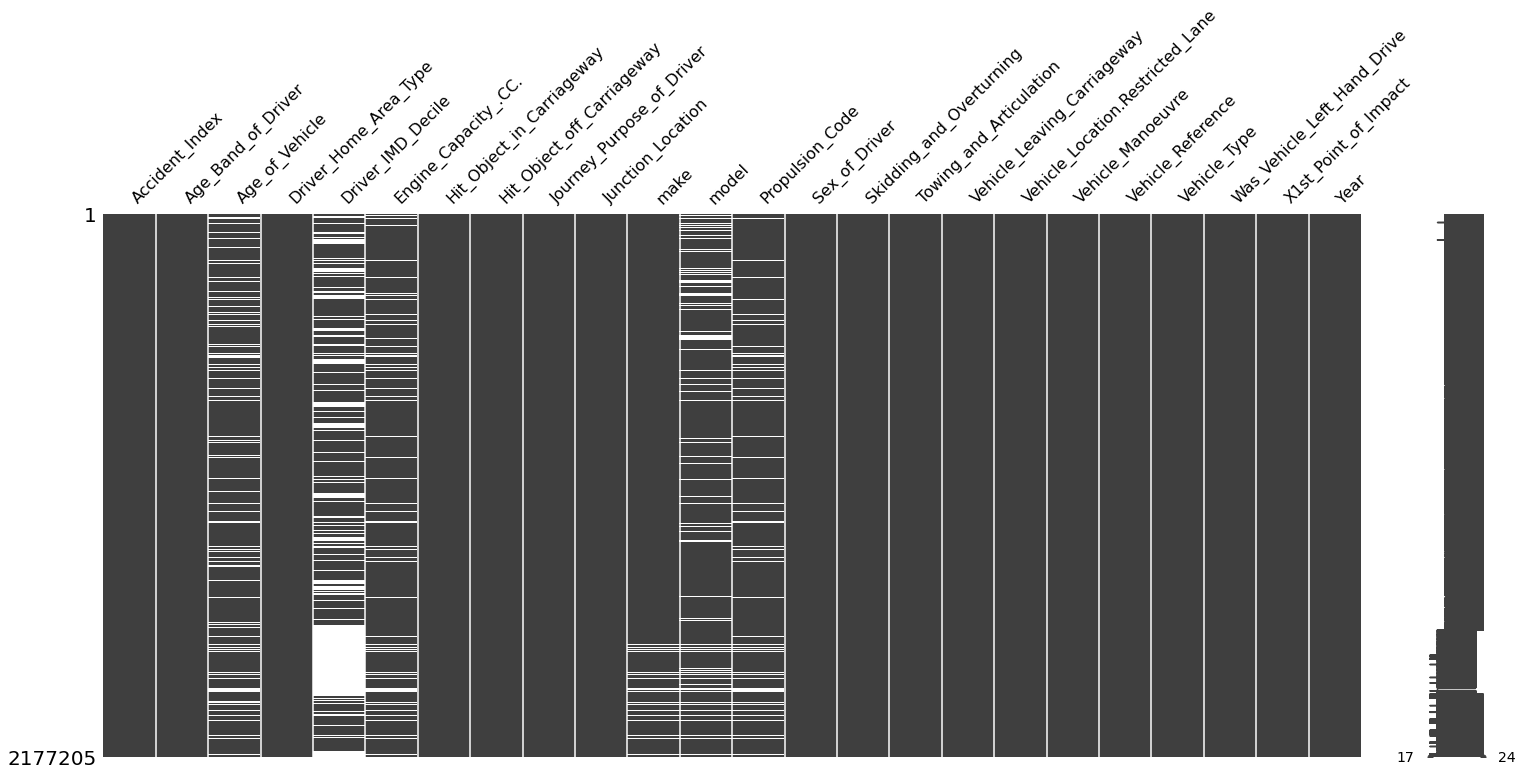

In [ ]:
mno.matrix(vehicle)

In [ ]:
vehicle.dropna(subset=['Vehicle_Location.Restricted_Lane'], inplace=True) 
vehicle['make'].replace(np.NaN, 'Unknown', inplace=True)
vehicle['model'].replace(np.NaN, 'Unknown', inplace=True)
vehicle['Propulsion_Code'].replace(np.NaN, 'Unknown', inplace=True)
vehicle['Driver_IMD_Decile'].replace(np.NaN, 0, inplace=True)
vehicle['Age_of_Vehicle'].replace(np.NaN, -1, inplace=True)
vehicle['Engine_Capacity_.CC.'].replace(np.NaN, -1, inplace=True)
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175888 entries, 0 to 2177204
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Age_Band_of_Driver                object 
 2   Age_of_Vehicle                    float64
 3   Driver_Home_Area_Type             object 
 4   Driver_IMD_Decile                 float64
 5   Engine_Capacity_.CC.              float64
 6   Hit_Object_in_Carriageway         object 
 7   Hit_Object_off_Carriageway        object 
 8   Journey_Purpose_of_Driver         object 
 9   Junction_Location                 object 
 10  make                              object 
 11  model                             object 
 12  Propulsion_Code                   object 
 13  Sex_of_Driver                     object 
 14  Skidding_and_Overturning          object 
 15  Towing_and_Articulation           object 
 16  Vehicle_Leaving_Carriageway       ob

<AxesSubplot:>

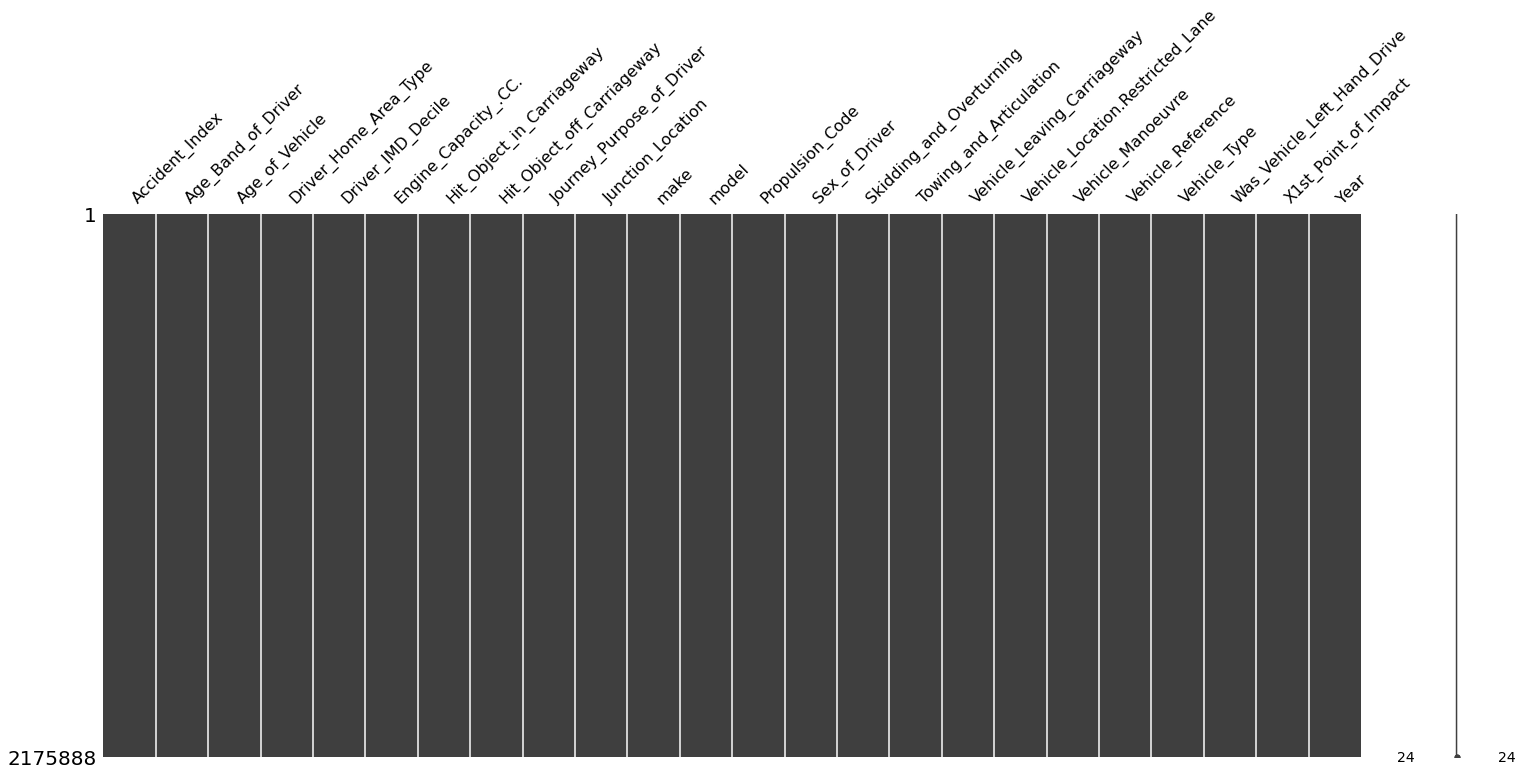

In [ ]:
mno.matrix(vehicle)

In [ ]:
for column in vehicle.columns:
    print(column + ' : ' + str(len(vehicle[column].unique())))
    if(len(vehicle[column].unique()) < 100):
        print(column + ' : ' + str(vehicle[column].unique()))
    print('\n')

Accident_Index : 1488220


Age_Band_of_Driver : 12
Age_Band_of_Driver : ['26 - 35' '66 - 75' '36 - 45' '46 - 55' '21 - 25'
 'Data missing or out of range' '16 - 20' '56 - 65' 'Over 75' '11 - 15'
 '6 - 10' '0 - 5']


Age_of_Vehicle : 89
Age_of_Vehicle : [  3.  -1.   4.   1.  10.   2.  11.   6.   9.   5.  13.  15.   7.  12.
   8.  16.  14.  28.  41.  17.  37.  21.  27.  23.  20.  24.  18.  25.
  38.  40.  39.  26.  42.  36.  19.  22.  30.  34.  32.  29.  31.  33.
  45.  35.  49.  43.  48.  71.  47.  52.  46.  44.  53.  51.  50.  76.
  85.  58.  78.  64.  80.  61.  68.  59.  54.  63.  55.  57.  65.  60.
  56.  66.  72.  70.  75.  69.  95.  83.  79.  73. 111.  77.  74. 104.
  90. 105.  91.  84.  67.]


Driver_Home_Area_Type : 4
Driver_Home_Area_Type : ['Urban area' 'Data missing or out of range' 'Rural' 'Small town']


Driver_IMD_Decile : 11
Driver_IMD_Decile : [ 4.  3.  0.  8.  6. 10.  7.  5.  2.  1.  9.]


Engine_Capacity_.CC. : 2556


Hit_Object_in_Carriageway : 13
Hit_Object_in_Carriag